## Tickers With Positive Sentiment Scores from Twitter


### References:
#### VaderSentiment
Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

#### Tweepy
https://docs.tweepy.org/en/latest/


### Note:
Please do not run the following code, as our Twitter tweet / request allocation is nearly maxed out due to limitations placed on the free version of Twitter Premium API access. 

### Install Necesary Libraries

In [ ]:
pip install tweepy

In [ ]:
pip install --upgrade git+https://github.com/tweepy/tweepy@master

  Cloning https://github.com/tweepy/tweepy (to revision master) to /tmp/pip-req-build-nk06vw3w
  Running command git clone -q https://github.com/tweepy/tweepy /tmp/pip-req-build-nk06vw3w
  Created wheel for tweepy: filename=tweepy-3.10.0-py2.py3-none-any.whl size=54315 sha256=0ef7c52be1def369bc02a5bdeaee8c68692d13d7654edc06f9a54efd565273fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-379r4vie/wheels/12/5f/00/8cd18bd44822e1d48d9374f9db7e7f23e83cbde64e4a358680
Successfully built tweepy
  Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 4.3MB/s 


### Gain Access to Twitter / Tweets

In [ ]:
import tweepy
import vaderSentiment as vs
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import bs4 as bs
import requests
import pandas as pd
from datetime import datetime, timedelta

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth = tweepy.OAuthHandler("UNaMoG2j6OwcX3qVPGMolqy1l", "f0F0Cy0bILqXB3jrnkKpwj6Bthz4ZDuBHGS8UzDqcQDOcyStJ5")
#auth.set_access_token(key, secret)
auth.set_access_token("1392184312636878857-Z2TOHvpkAr2z4ahpeZ8VMO0Jix0zv6", "FCX64yUkWHKkiZyxCnEDRdyMhFQim8iRQWvwm9x24sYDE")

api = tweepy.API(auth, wait_on_rate_limit=True)

### Get Related Tweets to Find Top 3 Companies 

In [ ]:
hashtag = "#stocks"
date_until = datetime.strptime('02/02/2021', "%m/%d/%Y")
date_since = datetime.strptime('02/01/2021', "%m/%d/%Y")
trading_tweets = []

for i in range(0, 7):
  if len(str(date_since.month)) < 2:
    since_month = '0'+str(date_since.month)
  else:
    since_month = str(date_since.month)
  if len(str(date_until.month)) < 2:
    until_month = '0'+str(date_until.month)
  else:
    until_month = str(date_until.month)
  if len(str(date_until.day)) < 2:
    until_day = '0'+str(date_until.day)
  else:
    until_day = str(date_until.day)
  if len(str(date_since.day)) < 2:
    since_day = '0'+str(date_since.day)
  else:
    since_day = str(date_since.day)
  str_since = str(date_since.year) + since_month + since_day + '0000'
  str_until = str(date_until.year) + until_month + until_day + '0000'
  print(str_until)
  trading_tweets_temp = list(tweepy.Cursor(api.search_full_archive,label='cmsc472final', query=hashtag, fromDate=str_since, toDate=str_until).items(100))
  date_until += timedelta(days=1)
  trading_tweets.append(trading_tweets_temp)

202102020000
202102030000
202102040000
202102050000
202102060000
202102070000
202102080000


### Combine All 7 Days of Tweets Into One List / Get Text

In [ ]:
trading_tweets_text = []
for i in range(0, len(trading_tweets)):
  trading_tweets[i] = list(trading_tweets[i])
trading_tweets = [item for sublist in trading_tweets for item in sublist]
print(trading_tweets[0].text)
print(len(trading_tweets))
for i in range(0, len(trading_tweets)):
  trading_tweets_text.append(trading_tweets[i].text)
#print(trading_tweets_text[0])

Momentum Builds for Canoo Amid Apple Buzz - article I wrote for @investorplace https://t.co/zgtqsciah3 $GOEV $SPY… https://t.co/o0N7AxpiQW
700


### Get Company Tickers From tickers.csv File Linked Above

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/

ticker_table = pd.read_csv('tickers.csv')

list_tickers = []
for ind in ticker_table.index:
  list_tickers.append('$'+ticker_table['Symbol'][ind]+ ' ')

print(list_tickers)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
['$A ', '$AA ', '$AAC ', '$AAIC ', '$AAIC^B ', '$AAIC^C ', '$AAN ', '$AAP ', '$AAT ', '$AB ', '$ABB ', '$ABBV ', '$ABC ', '$ABEV ', '$ABG ', '$ABM ', '$ABR ', '$ABR^A ', '$ABR^B ', '$ABR^C ', '$ABT ', '$AC ', '$ACA ', '$ACB ', '$ACC ', '$ACCO ', '$ACEL ', '$ACH ', '$ACI ', '$ACIC ', '$ACII ', '$ACM ', '$ACN ', '$ACND ', '$ACP ', '$ACR ', '$ACR^C ', '$ACRE ', '$ACV ', '$ADC ', '$ADCT ', '$ADEX ', '$ADM ', '$ADNT ', '$ADS ', '$ADT ', '$ADX ', '$AEB ', '$AEE ', '$AEFC ', '$AEG ', '$AEL ', '$AEL^A ', '$AEL^B ', '$AEM ', '$AENZ ', '$AEO ', '$AER ', '$AES ', '$AESC ', '$AEVA ', '$AFB ', '$AFG ', '$AFGB ', '$AFGC ', '$AFGD ', '$AFGE ', '$AFI ', '$AFL ', '$AFT ', '$AG ', '$AGAC ', '$AGCB ', '$AGCO ', '$AGD ', '$AGI ', '$AGL ', '$AGM ', '$AGM^C ', '$AGM^D ', '$AGM^E ', '$AGM^F ', '$AGO ', '$AGO^B ', '$AGO^E ', '$AGO^F ', '$AGR ', '$AGRO ', '$AG

### Make A Dictionary {'ticker' : [tweets about ticker]}

In [ ]:
ticker_tweets = {}

for k in range(0, len(list_tickers)):
  ticker_tweets[list_tickers[k]] = []

print(ticker_tweets)
for i in range(0, len(trading_tweets_text)):
  for j in range(0, len(list_tickers)):
    if list_tickers[j] in trading_tweets_text[i]:
      ticker_tweets[list_tickers[j]].append(trading_tweets[i])

{'$A ': [], '$AA ': [], '$AAC ': [], '$AAIC ': [], '$AAIC^B ': [], '$AAIC^C ': [], '$AAN ': [], '$AAP ': [], '$AAT ': [], '$AB ': [], '$ABB ': [], '$ABBV ': [], '$ABC ': [], '$ABEV ': [], '$ABG ': [], '$ABM ': [], '$ABR ': [], '$ABR^A ': [], '$ABR^B ': [], '$ABR^C ': [], '$ABT ': [], '$AC ': [], '$ACA ': [], '$ACB ': [], '$ACC ': [], '$ACCO ': [], '$ACEL ': [], '$ACH ': [], '$ACI ': [], '$ACIC ': [], '$ACII ': [], '$ACM ': [], '$ACN ': [], '$ACND ': [], '$ACP ': [], '$ACR ': [], '$ACR^C ': [], '$ACRE ': [], '$ACV ': [], '$ADC ': [], '$ADCT ': [], '$ADEX ': [], '$ADM ': [], '$ADNT ': [], '$ADS ': [], '$ADT ': [], '$ADX ': [], '$AEB ': [], '$AEE ': [], '$AEFC ': [], '$AEG ': [], '$AEL ': [], '$AEL^A ': [], '$AEL^B ': [], '$AEM ': [], '$AENZ ': [], '$AEO ': [], '$AER ': [], '$AES ': [], '$AESC ': [], '$AEVA ': [], '$AFB ': [], '$AFG ': [], '$AFGB ': [], '$AFGC ': [], '$AFGD ': [], '$AFGE ': [], '$AFI ': [], '$AFL ': [], '$AFT ': [], '$AG ': [], '$AGAC ': [], '$AGCB ': [], '$AGCO ': [], '$

### Find Top 3 Most Mentioned Companies

In [ ]:
max1 = 0
max1_comp = ''
max2 = 0
max2_comp = ''
max3 = 0
max3_comp = ''
for key in ticker_tweets.keys():
  list_len = len(ticker_tweets[key])
  if list_len > max1:
    max3 = max2
    max3_comp = max2_comp
    max2 = max1
    max2_comp = max1_comp
    max1 = list_len
    max1_comp = key
  elif list_len > max2:
    max3 = max2
    max3_comp = max2_comp
    max2 = list_len
    max2_comp = key
  elif list_len > max3:
    max3 = list_len
    max3_comp = key

print(max1_comp)
print(max1)
print(max2_comp)
print(max2)
print(max3_comp)
print(max3)

$TSLA 
16
$GME 
15
$AMZN 
9


### Get Tweets About Each Company (Top 100 Tweets Per Day)

In [ ]:
date_until = datetime.strptime('02/02/2021', "%m/%d/%Y")
date_since = datetime.strptime('02/01/2021', "%m/%d/%Y")
max1_tweets = []

for i in range(0, 7):
  if len(str(date_since.month)) < 2:
    since_month = '0'+str(date_since.month)
  else:
    since_month = str(date_since.month)
  if len(str(date_until.month)) < 2:
    until_month = '0'+str(date_until.month)
  else:
    until_month = str(date_until.month)
  if len(str(date_until.day)) < 2:
    until_day = '0'+str(date_until.day)
  else:
    until_day = str(date_until.day)
  if len(str(date_since.day)) < 2:
    since_day = '0'+str(date_since.day)
  else:
    since_day = str(date_since.day)
  str_since = str(date_since.year) + since_month + since_day + '0000'
  str_until = str(date_until.year) + until_month + until_day + '0000'
  print(str_until)
  trading_tweets_temp = list(tweepy.Cursor(api.search_full_archive,label='cmsc472final', query=max1_comp[1:], fromDate=str_since, toDate=str_until).items(100))
  date_until += timedelta(days=1)
  max1_tweets.append(trading_tweets_temp)

202102020000
202102030000
202102040000
202102050000
202102060000
202102070000
202102080000


In [ ]:
hashtag = max2_comp[1:]
date_until = datetime.strptime('02/02/2021', "%m/%d/%Y")
date_since = datetime.strptime('02/01/2021', "%m/%d/%Y")
max2_tweets = []

for i in range(0, 7):
  if len(str(date_since.month)) < 2:
    since_month = '0'+str(date_since.month)
  else:
    since_month = str(date_since.month)
  if len(str(date_until.month)) < 2:
    until_month = '0'+str(date_until.month)
  else:
    until_month = str(date_until.month)
  if len(str(date_until.day)) < 2:
    until_day = '0'+str(date_until.day)
  else:
    until_day = str(date_until.day)
  if len(str(date_since.day)) < 2:
    since_day = '0'+str(date_since.day)
  else:
    since_day = str(date_since.day)
  str_since = str(date_since.year) + since_month + since_day + '0000'
  str_until = str(date_until.year) + until_month + until_day + '0000'
  print(str_until)
  trading_tweets_temp = list(tweepy.Cursor(api.search_full_archive,label='cmsc472final', query=hashtag, fromDate=str_since, toDate=str_until).items(100))
  date_until += timedelta(days=1)
  max2_tweets.append(trading_tweets_temp)

202102020000
202102030000
202102040000
202102050000
202102060000
202102070000
202102080000


In [ ]:
hashtag = max3_comp[1:]
date_until = datetime.strptime('02/02/2021', "%m/%d/%Y")
date_since = datetime.strptime('02/01/2021', "%m/%d/%Y")
max3_tweets = []

for i in range(0, 7):
  if len(str(date_since.month)) < 2:
    since_month = '0'+str(date_since.month)
  else:
    since_month = str(date_since.month)
  if len(str(date_until.month)) < 2:
    until_month = '0'+str(date_until.month)
  else:
    until_month = str(date_until.month)
  if len(str(date_until.day)) < 2:
    until_day = '0'+str(date_until.day)
  else:
    until_day = str(date_until.day)
  if len(str(date_since.day)) < 2:
    since_day = '0'+str(date_since.day)
  else:
    since_day = str(date_since.day)
  str_since = str(date_since.year) + since_month + since_day + '0000'
  str_until = str(date_until.year) + until_month + until_day + '0000'
  print(str_until)
  trading_tweets_temp = list(tweepy.Cursor(api.search_full_archive,label='cmsc472final', query=hashtag, fromDate=str_since, toDate=str_until).items(100))
  date_until += timedelta(days=1)
  max3_tweets.append(trading_tweets_temp)

202102020000
202102030000
202102040000
202102050000
202102060000
202102070000
202102080000


### Flatten Lists 

In [ ]:
max1_tweets = [item for sublist in max1_tweets for item in sublist]
max2_tweets = [item for sublist in max2_tweets for item in sublist]
max3_tweets = [item for sublist in max3_tweets for item in sublist]
print(max1_tweets[0])

Status(_api=<tweepy.api.API object at 0x7fde93cf5c90>, _json={'created_at': 'Mon Feb 01 23:59:59 +0000 2021', 'id': 1356391881723273216, 'id_str': '1356391881723273216', 'text': 'RT @28delayslater: My condolences to shareholders who had to watch $TSLA trade in the $700 range for a day.', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2541922591, 'id_str': '2541922591', 'name': 'Javier Ayala | 🇸🇻', 'screen_name': 'JvrAyl', 'location': 'Salvadoran', 'url': 'https://www.instagram.com/jvrayl', 'description': 'Entrepreneurship | Visual Arts | Memes', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 662, 'friends_count': 420, 'listed_count': 6, 'favourites_count': 33379, 'statuses_count': 23518, 'created_at': 'Mon J

### Get Sentiment Score Per Tweet Per Ticker and Create Dictionary: {ticker: ([scores],[dates])}

In [ ]:
analyzer = SentimentIntensityAnalyzer()
max1_scores = ([],[])
max2_scores = ([],[])
max3_scores = ([],[])

for i in range(0, len(max1_tweets)):
  score_dict = analyzer.polarity_scores(max1_tweets[i].text)
  max1_scores[0].append(score_dict['compound'])
  max1_scores[1].append((max1_tweets[i].created_at).date())

for i in range(0, len(max2_tweets)):
  score_dict = analyzer.polarity_scores(max2_tweets[i].text)
  max2_scores[0].append(score_dict['compound'])
  max2_scores[1].append((max2_tweets[i].created_at).date())

for i in range(0, len(max3_tweets)):
  score_dict = analyzer.polarity_scores(max3_tweets[i].text)
  max3_scores[0].append(score_dict['compound'])
  max3_scores[1].append((max3_tweets[i].created_at).date())

print(max3_scores[1]) # -1 is most negative, 1 is most positive

[datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), datetime.date(2021, 2, 1), 

In [ ]:
compound_scores = {max1_comp: max1_scores,
                   max2_comp: max2_scores,
                   max3_comp: max3_scores}

by_comp_by_day = {}

for ticker in compound_scores.keys():
  scores = compound_scores[ticker][0]
  dates = compound_scores[ticker][1]

  mini_dict = {}  ## {date: [raw scores]}
  for i in range(0, len(dates)):
    if dates[i] in mini_dict.keys():
      mini_dict[dates[i]].append(scores[i])
    else:
      mini_dict[dates[i]] = [scores[i]]
  
  mini_scores_dict = {} ## {date: binary score}
  for key in mini_dict.keys():
    mini_scores = mini_dict[key]
    mean = 0
    for j in range(0, len(mini_scores)):
      mean = mean + mini_scores[j] / len(mini_scores)
    mini_scores_dict[key] = mean

  by_comp_by_day[ticker] = mini_scores_dict

by_comp_by_day

{'$AMZN ': {datetime.date(2021, 2, 1): 0.07149100000000003,
  datetime.date(2021, 2, 2): 0.3383630000000002,
  datetime.date(2021, 2, 3): 0.066944,
  datetime.date(2021, 2, 4): 0.11910800000000002,
  datetime.date(2021, 2, 5): 0.08934500000000001,
  datetime.date(2021, 2, 6): 0.09923900000000002,
  datetime.date(2021, 2, 7): 0.105373},
 '$GME ': {datetime.date(2021, 2, 1): 0.05745500000000001,
  datetime.date(2021, 2, 2): -0.008162999999999997,
  datetime.date(2021, 2, 3): 0.12048,
  datetime.date(2021, 2, 4): 0.040459999999999996,
  datetime.date(2021, 2, 5): 0.15605299999999994,
  datetime.date(2021, 2, 6): 0.137493,
  datetime.date(2021, 2, 7): 0.05725199999999994},
 '$TSLA ': {datetime.date(2021, 2, 1): 0.18284299999999998,
  datetime.date(2021, 2, 2): 0.15294499999999997,
  datetime.date(2021, 2, 3): 0.21022699999999991,
  datetime.date(2021, 2, 4): 0.14828799999999998,
  datetime.date(2021, 2, 5): 0.09897900000000001,
  datetime.date(2021, 2, 6): 0.19793299999999997,
  datetime.d

### Create Lists to be Columns of Dataframe For Score Per Day Per Ticker

In [ ]:
big_ticker_list = []
big_dates_list = []
big_scores_list = []

for key in by_comp_by_day.keys():
  dates = list(by_comp_by_day[key].keys())
  scores = list(by_comp_by_day[key].values())
  for i in range(0, len(dates)):
    big_ticker_list.append(key)
    big_dates_list.append(dates[i])
    big_scores_list.append(scores[i])

print(len(big_scores_list))
print(len(big_ticker_list))
print(len(big_dates_list))

21
21
21


### Create Dataframe Containing Above Information

In [ ]:
data = {'Tickers':big_ticker_list,
        'Dates':big_dates_list,
        'Scores':big_scores_list}
twitter_frames = pd.DataFrame(data)
twitter_frames

,Tickers,Dates,Scores
0,$TSLA,2021-02-01,0.182843
1,$TSLA,2021-02-02,0.152945
2,$TSLA,2021-02-03,0.210227
3,$TSLA,2021-02-04,0.148288
4,$TSLA,2021-02-05,0.098979
5,$TSLA,2021-02-06,0.197933
6,$TSLA,2021-02-07,0.211061
7,$GME,2021-02-01,0.057455
8,$GME,2021-02-02,-0.008163
9,$GME,2021-02-03,0.120480


RAN: twitter_frames.to_csv('twitter_df.csv')

LINK: https://drive.google.com/file/d/1x5MbWRX1cpkeJQLPT360rUl7fhcaUzBG/view?usp=sharing

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 32.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=83b1235a4e401cbe1d24ac004dbdfac83539c7a3c36322accca15b720cd1eda4
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


[*********************100%***********************]  1 of 1 completed


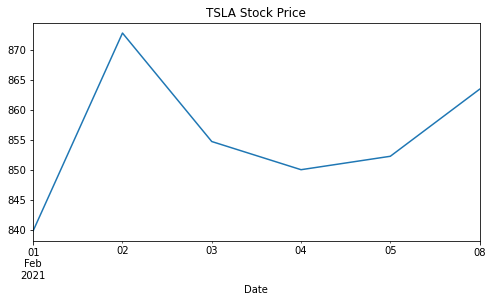

In [ ]:
from matplotlib import pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

tickerDataTSLA = yf.Ticker('TSLA')
yf.pdr_override()
TSLA_df = pdr.get_data_yahoo("TSLA", start="2021-02-01", end="2021-2-09")
TSLA_df['Adj Close'].plot(label='TSLA', figsize=(8,4), title='TSLA Stock Price')

[*********************100%***********************]  1 of 1 completed


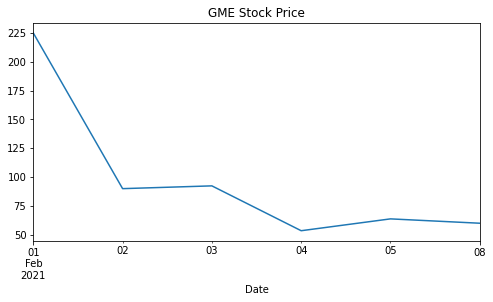

In [ ]:
tickerDataGME = yf.Ticker('GME')
yf.pdr_override()
GME_df = pdr.get_data_yahoo("GME", start="2021-02-01", end="2021-2-09")
GME_df['Adj Close'].plot(label='GME', figsize=(8,4), title='GME Stock Price')

[*********************100%***********************]  1 of 1 completed


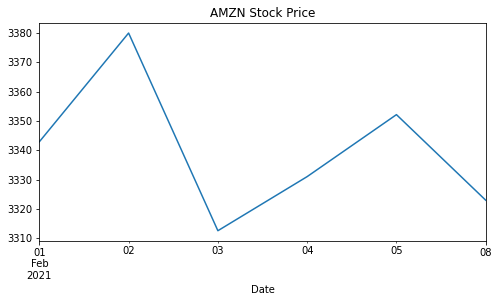

In [ ]:
tickerDataAMZN = yf.Ticker('AMZN')
yf.pdr_override()
AMZN_df = pdr.get_data_yahoo("AMZN", start="2021-02-01", end="2021-2-09")
AMZN_df['Adj Close'].plot(label='AMZN', figsize=(8,4), title='AMZN Stock Price')